<a href="https://colab.research.google.com/github/mohamednader973/ADC_DRIVER/blob/master/Breast_Cancer_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("/content/breast Cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop("Unnamed: 32",axis=1,inplace=True)

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**EDA**

In [12]:
col_mean=list(df.columns[1:11])
col_se=list(df.columns[11:21])
col_worst=list(df.columns[21:31])

In [14]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [17]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

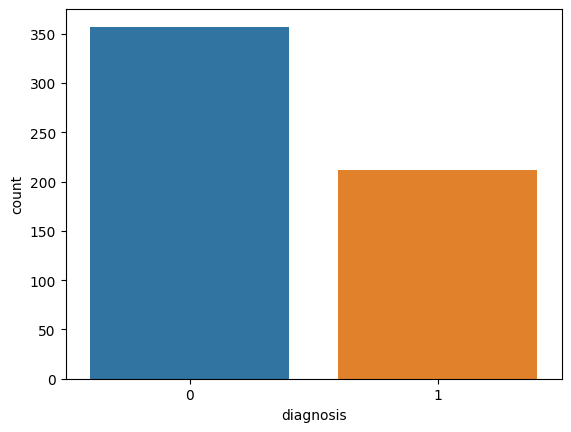

In [21]:
sns.countplot(data=df,x="diagnosis")

<Axes: >

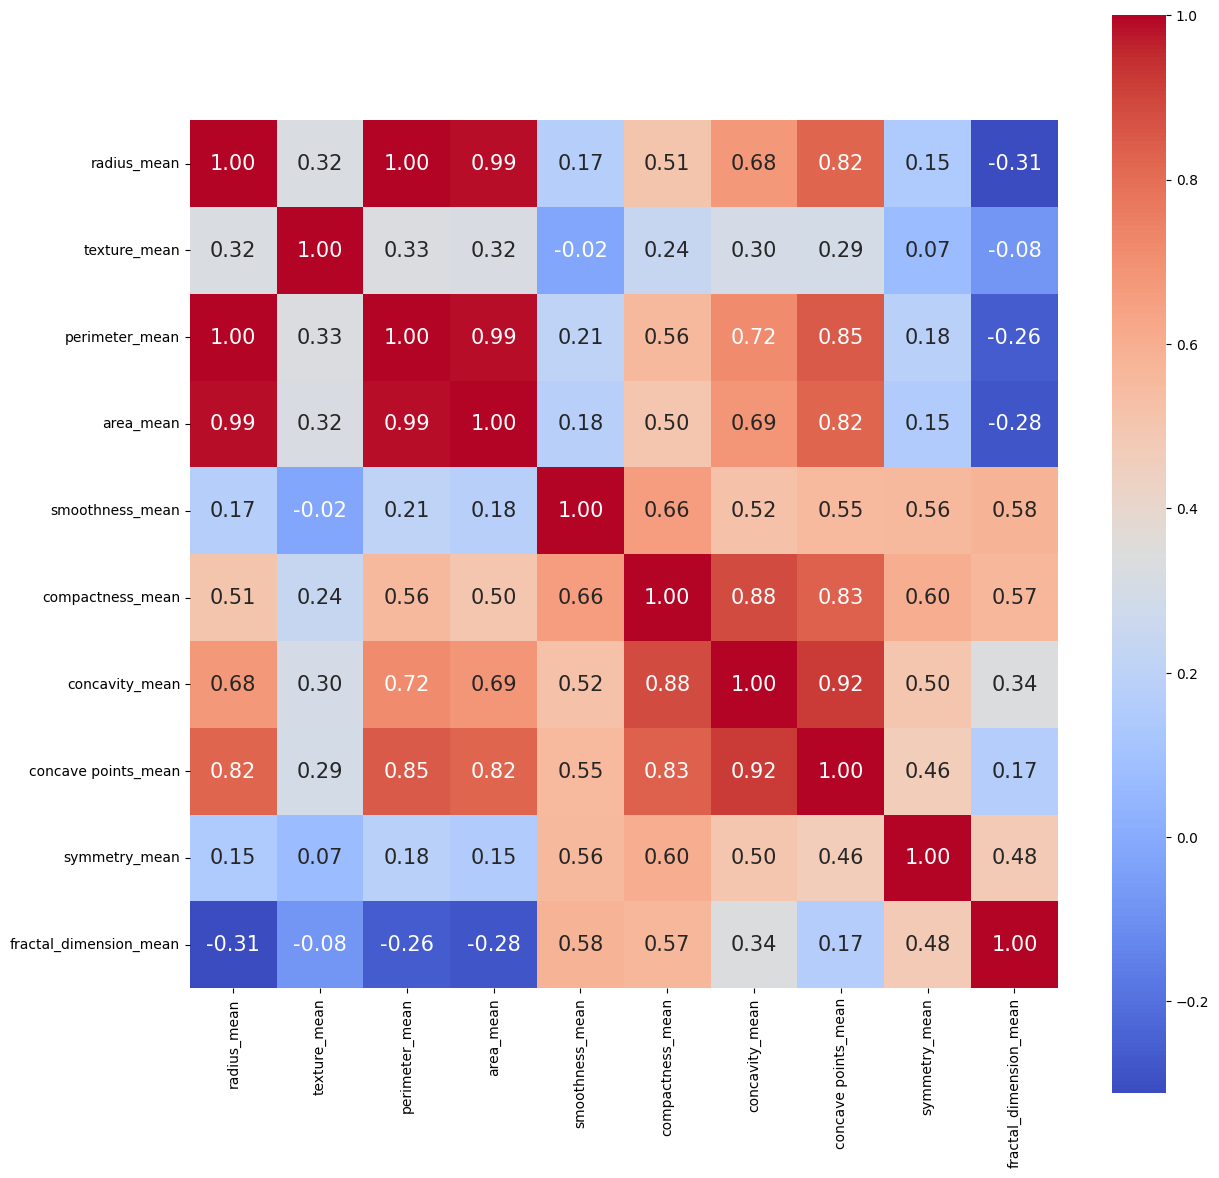

In [22]:
corr = df[col_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= col_mean, yticklabels= col_mean,
           cmap= 'coolwarm')

**area 
perimeter 
radius are highly correlated
and so also 
compactness , concavity and concave points** 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
x_col=["radius_mean","texture_mean","smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df[x_col].values
y=df["diagnosis"].values

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.30, random_state =30)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators= 100 , max_depth= 4 , max_features=6)

In [30]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=4, max_features=6)

In [32]:
print(rf.score(x_train , y_train))
print(rf.score(x_test , y_test))

0.9673366834170855
0.9239766081871345


In [33]:
from sklearn import metrics

In [34]:
prediction=rf.predict(x_test)

In [35]:
metrics.accuracy_score(prediction,y_test)

0.9239766081871345

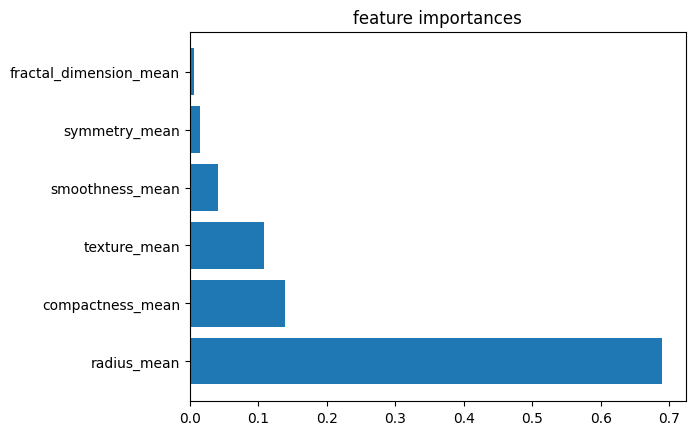

In [37]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()




# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), x_col, top=6)

-------------------------------------------------------------

SVM Model

In [36]:
from sklearn import svm 
SVM = svm.SVC()
SVM.fit(x_train,y_train)
prediction=SVM.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9122807017543859

-------------------------------------------------------------

In [38]:
x=df[col_mean]

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.30, random_state =30)

In [40]:
rf = RandomForestClassifier(n_estimators= 100 , max_depth= 6 , max_features=6)

In [41]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, max_features=6)

In [42]:
prediction=rf.predict(x_test)

In [43]:
metrics.accuracy_score(prediction,y_test)

0.9298245614035088

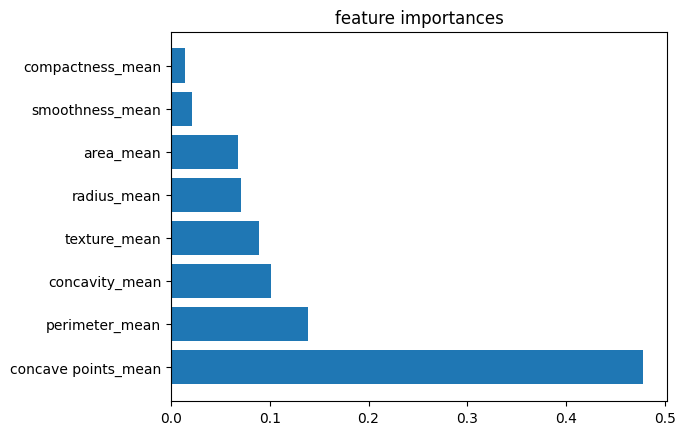

In [44]:
f_importances(abs(rf.feature_importances_), col_mean, top=8)

In [45]:
SVM = svm.SVC()
SVM.fit(x_train,y_train)
prediction=SVM.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9005847953216374

we take top 6 important features

In [46]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','texture_mean','concave points_mean','concavity_mean']

In [47]:
x=df[prediction_var]

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.30, random_state =30)

In [49]:
rf = RandomForestClassifier(n_estimators= 100 , max_depth= 6 , max_features=6)

In [50]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=6, max_features=6)

In [51]:
prediction=rf.predict(x_test)

In [52]:
metrics.accuracy_score(prediction,y_test)

0.935672514619883

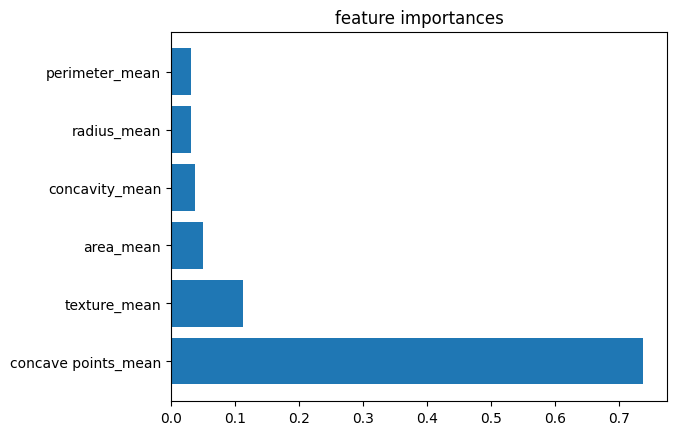

In [54]:
f_importances(abs(rf.feature_importances_), prediction_var, top=6)

In [55]:
SVM = svm.SVC()
SVM.fit(x_train,y_train)
prediction=SVM.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9005847953216374

ML Model for worst samples

In [56]:
prediction_var = col_worst

In [57]:
x=df[prediction_var]
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.30, random_state =30)
rf = RandomForestClassifier(n_estimators= 100 , max_depth= 6 , max_features=6)
rf.fit(x_train , y_train)
prediction=rf.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9532163742690059

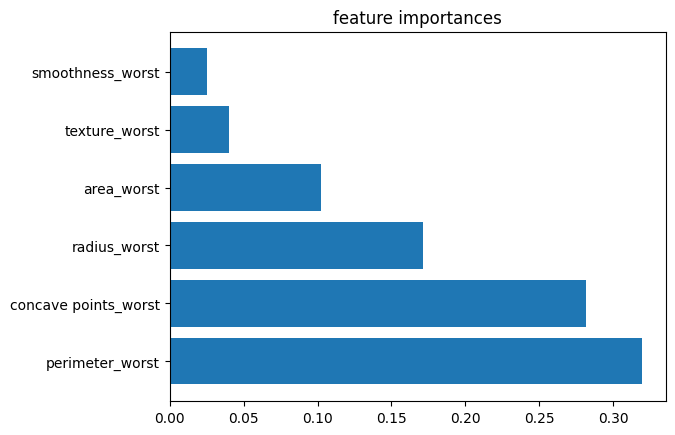

In [58]:
f_importances(abs(rf.feature_importances_), prediction_var, top=6)

In [59]:
SVM = svm.SVC()
SVM.fit(x_train,y_train)
prediction=SVM.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.9122807017543859

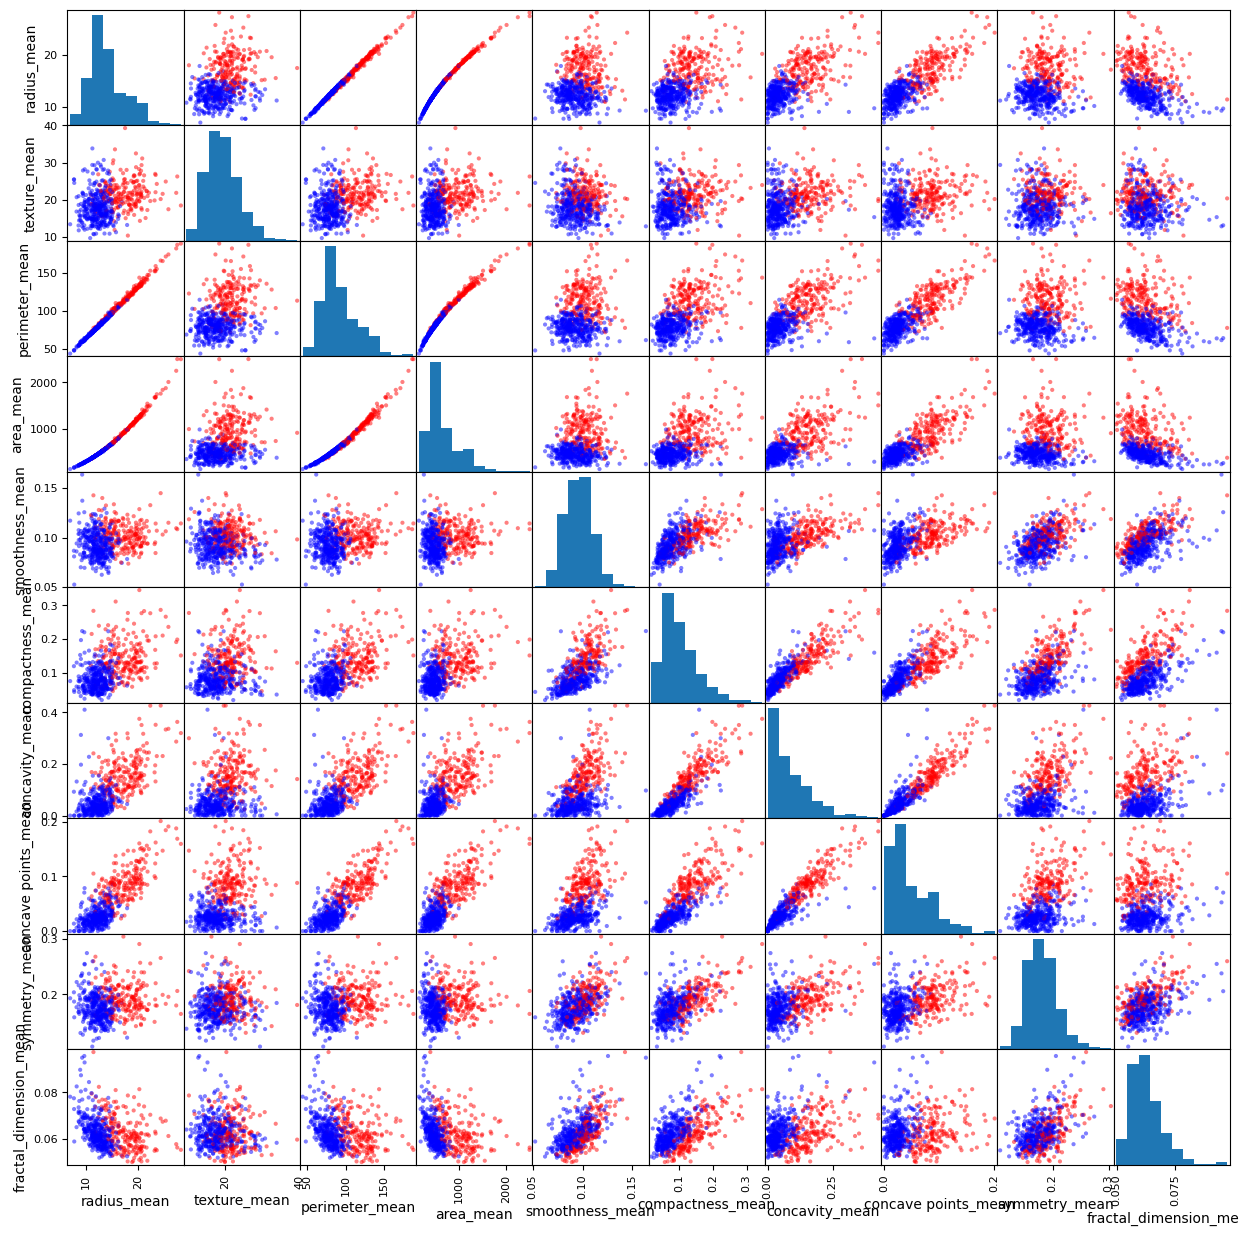

In [61]:
from pandas.plotting import scatter_matrix
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = df["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
scatter_matrix(df[col_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

**Cross Validation**

In [63]:
df.shape[0]

569

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [72]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) 
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y)) 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [73]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','texture_mean','concave points_mean','concavity_mean']
outcome_var= "diagnosis"
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.351%
Cross-Validation Score : 89.912%
Cross-Validation Score : 91.520%
Cross-Validation Score : 92.105%
Cross-Validation Score : 91.914%


In [75]:
model = svm.SVC()

classification_model(model,df,prediction_var,outcome_var)

Accuracy : 88.752%
Cross-Validation Score : 71.930%
Cross-Validation Score : 77.632%
Cross-Validation Score : 83.918%
Cross-Validation Score : 86.184%
Cross-Validation Score : 87.531%


In [84]:
model = KNeighborsClassifier(n_neighbors=12)
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 89.455%
Cross-Validation Score : 75.439%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.719%
Cross-Validation Score : 88.583%


In [85]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 87.719%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.860%
Cross-Validation Score : 94.026%


In [86]:
from sklearn.linear_model import LogisticRegression

In [92]:
model=LogisticRegression(C=1000)
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 93.497%
Cross-Validation Score : 84.211%
Cross-Validation Score : 88.158%
Cross-Validation Score : 90.643%
Cross-Validation Score : 91.667%
Cross-Validation Score : 91.740%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [93]:
prediction_var 

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'texture_mean',
 'concave points_mean',
 'concavity_mean']

**Grid search**

In [94]:
data_X= df[prediction_var]
data_y= df["diagnosis"]

In [95]:
x_train , x_test , y_train , y_test = train_test_split(data_X,data_y, test_size= 0.30, random_state =30)

In [96]:
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(x_train,y_train)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    print(clf.best_score_)

First Decision tree

In [97]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

The best parameter found on development set is :
{'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2}
the bset estimator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=5)
The best score is 
0.9423717948717949


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


KNN

In [98]:
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 20, 'weights': 'distance'}
the bset estimator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=20, weights='distance')
The best score is 
0.8917948717948718


In [99]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 1000, 'kernel': 'linear'}
the bset estimator is 
SVC(C=1000, kernel='linear')
The best score is 
0.9294871794871795


*Conclusion *

---


**the random tree forest model is the best**